## HW1, problem 4

In [396]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [134]:
def generate_x(n):
    result = 0
    list_x = []
    for i in range(0,n):
        x = random.uniform(0,1)
        list_x.append(x)
    for i in list_x:
        result += i
    return 1/n * result

In [142]:
def Variance(data):
    
    n = len(data)
    mean = sum(data) / n
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / n
    
    return variance, mean

In [143]:
def generate_y(n):
    list_y = []
    mean_y = 0
    for i in range(0,1000):
        result = generate_x(n)
        y = result
        list_y.append(y)
    for i in list_y:
        mean_y += i
    variance, mean = Variance(list_y)
    return list_y, variance, mean

In [147]:
list1, variance1, mean1 = generate_y(100)
list2, variance2, mean2 = generate_y(1000)
list3, variance3, mean3 = generate_y(10000)
list4, variance4, mean4 = generate_y(100000)

In [150]:
Variace_and_Mean = [(variance1, mean1), (variance2, mean2), (variance3, mean3), (variance4, mean4)]

In [151]:
Variace_and_Mean

[(0.000800076755061868, 0.5004539746180213),
 (8.306805411433942e-05, 0.4999818798932661),
 (7.480166227556944e-06, 0.5000106254844492),
 (7.932950095170634e-07, 0.49998566856527554)]

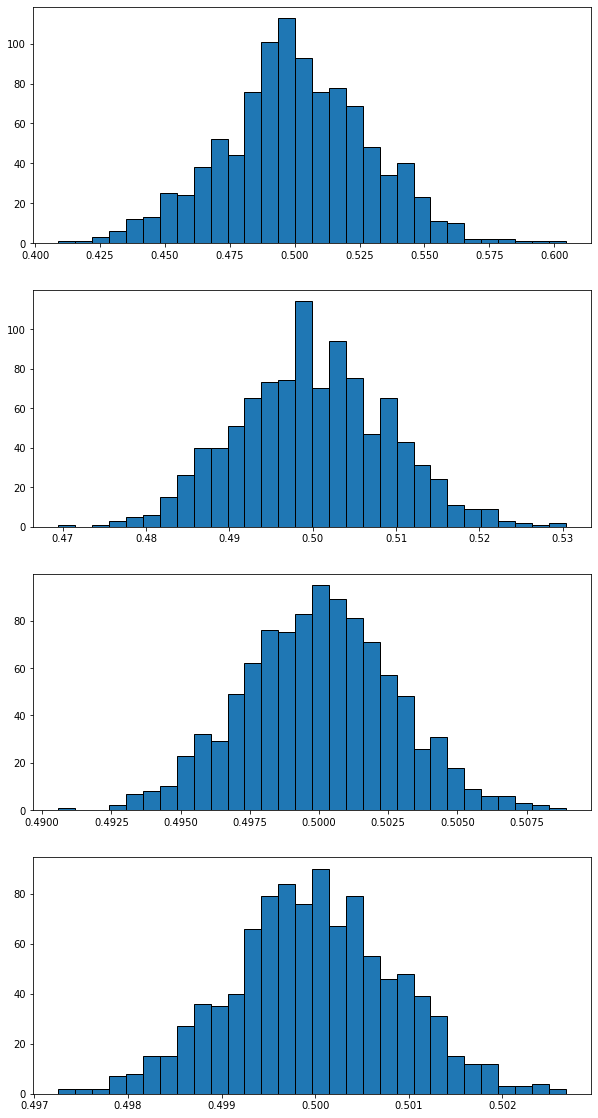

In [148]:
fig = plt.figure(figsize=(10,20))

plt.subplot(4,1,1)
plt.hist(list1,bins=30,edgecolor='black')

plt.subplot(4,1,2)
plt.hist(list2,bins=30,edgecolor='black')

plt.subplot(4,1,3)
plt.hist(list3,bins=30,edgecolor='black')

plt.subplot(4,1,4)
plt.hist(list4,bins=30,edgecolor='black')

fig.savefig('problem4.jpg')

## HW1, problem 6

In [69]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

In [70]:
def total_dist(a1, a2, dist1, dist2):
    return a1 * dist1 + a2 * dist2

In [71]:
x = np.linspace(-5,10,200)

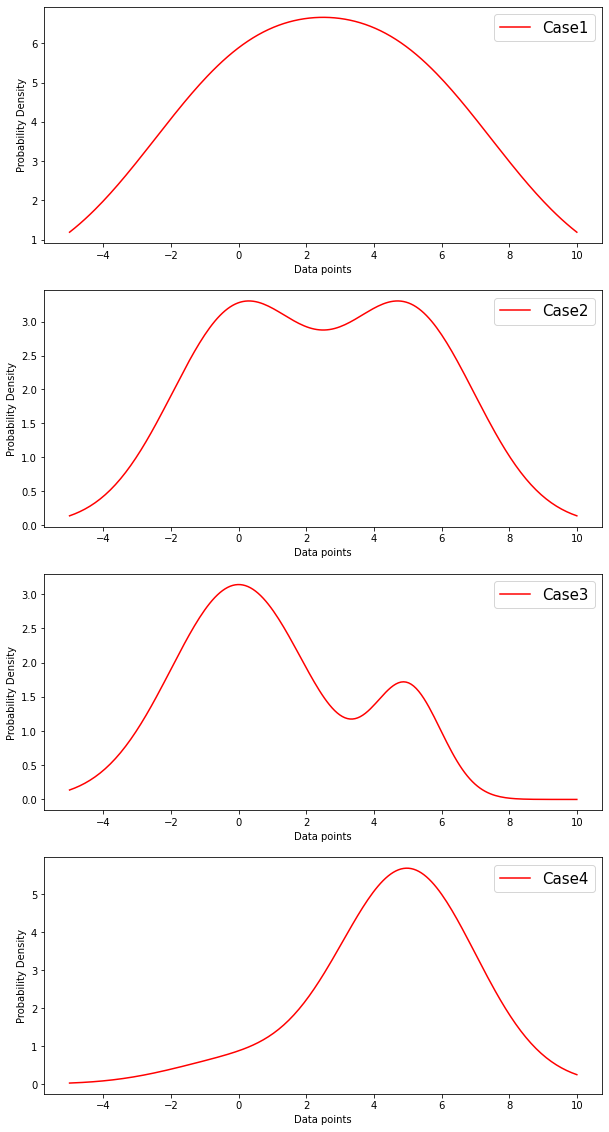

In [94]:
fig = plt.figure(figsize=(10,20))

plt.subplot(4,1,1)
plt.plot(x,total_dist(0.5, 0.5, normal_dist(x,0,3), normal_dist(x,5,3)) , color = 'red', label="Case1")
plt.legend(loc='upper right',fontsize=15)
plt.xlabel('Data points')
plt.ylabel('Probability Density')
# plt.show()

plt.subplot(4,1,2)
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.plot(x,total_dist(0.5, 0.5, normal_dist(x,0,2), normal_dist(x,5,2)) , color = 'red',label="Case2")
plt.legend(loc='upper right',fontsize=15)
# plt.show()

plt.subplot(4,1,3)
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.plot(x,total_dist(0.5, 0.5, normal_dist(x,0,2), normal_dist(x,5,1)) , color = 'red',label="Case3")
plt.legend(loc='upper right',fontsize=15)
# plt.show()

plt.subplot(4,1,4)
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.plot(x,total_dist(0.1, 0.9, normal_dist(x,0,2), normal_dist(x,5,2)) , color = 'red',label="Case4")
plt.legend(loc='upper right',fontsize=15)
# plt.show()
fig.savefig('problem6.jpg')

## problem 3

In [121]:
import math
from scipy.special import gamma

In [122]:
def fact(n):  
    return 1 if (n==1 or n==0) else n * fact(n - 1);  

In [123]:
def ratio(n):
    return (math.sqrt(math.pi)/2)**n / gamma(n/2+1)

In [124]:
dimension = [i for i in range(1,11)]

In [125]:
result = []
for i in dimension:
    result.append(ratio(i)) 

In [126]:
result

[1.0,
 0.7853981633974482,
 0.5235987755982987,
 0.3084251375340424,
 0.16449340668482254,
 0.08074551218828074,
 0.03691223414321405,
 0.01585434424381549,
 0.006442400200661532,
 0.002490394570192718]

## HW 2 problem 2

In [439]:
import numpy as np

In [440]:
data_set1 = np.array([11,5,9,52,13,25,3,6,7,12])

In [441]:
def exp_density(x,teta):
    return 1/teta*math.exp((-1/teta)*x)

In [442]:
def gaussian_density(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

In [443]:
def log_likelihood_exp(data_set,teta):
    n = len(data_set)
    sum_term = np.sum(data_set)
    return n*np.log(1/teta) - (1/teta)*sum_term

In [444]:
def log_likelihood_gussian(data_set,teta):
    n = len(data_set)
    sigma = np.var(data_set,ddof=0)
    res = []
    for i in teta:
        mu = i
        sum_term = (data_set - mu)**2
        sum_term = np.sum(sum_term)
        res.append(-(n/2)*np.log(2*np.pi*(sigma)) - (1/(2*sigma))*sum_term)
    return res

In [445]:
def log_likelihood_uniform(b,data_set):
    n = len(data_set)
    res = []
    for i in range(len(teta)):
        res.append(-n*np.log(b-0))
    return res

In [446]:
teta = np.linspace(3,40,20000)

In [447]:
res_gussian = log_likelihood_gussian(data_set1,teta)

In [448]:
res_uniform_b_60 = log_likelihood_uniform(60,data_set1)

In [449]:
res_uniform_b_100 = log_likelihood_uniform(100,data_set1)

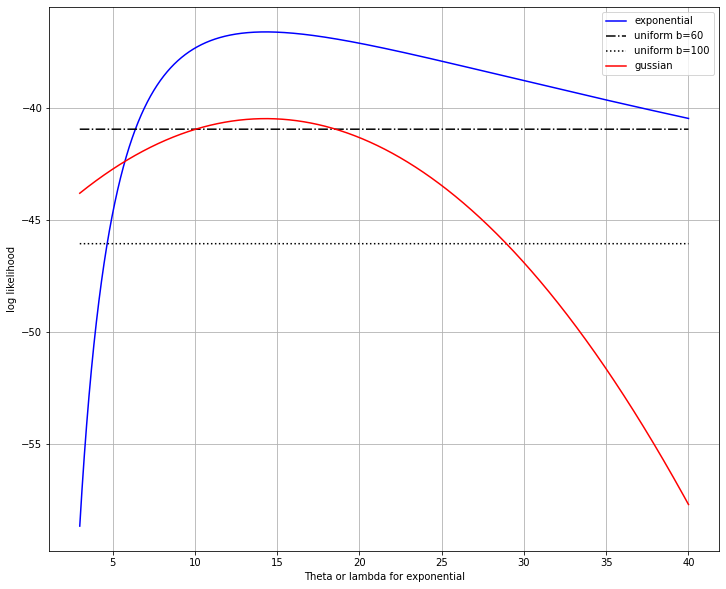

In [450]:
fig1 = plt.figure(figsize=(12,10))
plt.plot(teta,log_likelihood_exp(data_set1,teta),label="exponential",color='blue')
plt.plot(teta,res_uniform_b_60,label="uniform b=60",linestyle='dashdot',color ='black')
plt.plot(teta,res_uniform_b_100,label="uniform b=100",ls='dotted',color ='black')
plt.plot(teta,res_gussian,label="gussian",color='red')

plt.xlabel("Theta or lambda for exponential")
plt.ylabel("log likelihood")
plt.legend()
plt.grid()
fig1.savefig('hw_2_problem2.jpg')

## part 2

In [425]:
data_set2 = [11,33,19,44,13,25,31,26,37,22]

In [426]:
res_gussian = log_likelihood_gussian(data_set2,teta)

In [427]:
res_uniform_b_60 = log_likelihood_uniform(60,data_set2)

In [428]:
res_uniform_b_100 = log_likelihood_uniform(100,data_set2)

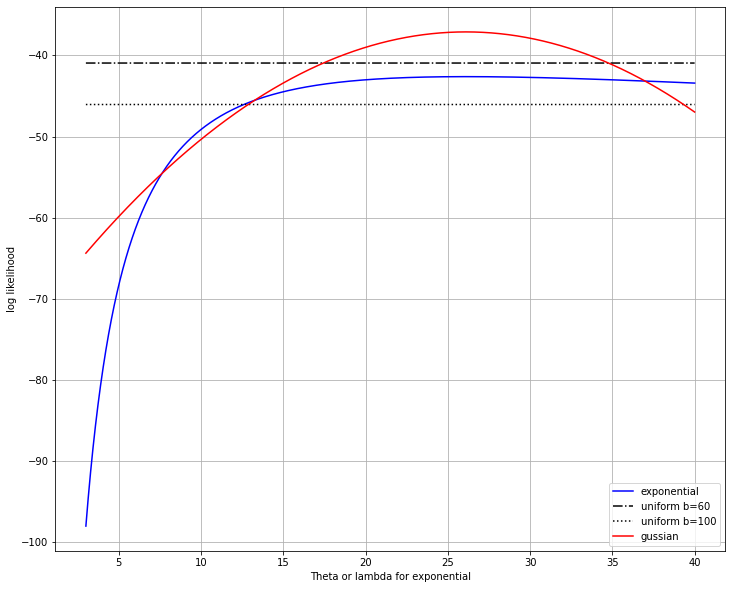

In [437]:
fig2 = plt.figure(figsize=(12,10))
plt.plot(teta,log_likelihood_exp(data_set2,teta),label="exponential",color='blue')
plt.plot(teta,res_uniform_b_60,label="uniform b=60",linestyle='dashdot',color ='black')
plt.plot(teta,res_uniform_b_100,label="uniform b=100",ls='dotted',color ='black')
plt.plot(teta,res_gussian,label="gussian",color='red')

plt.xlabel("Theta or lambda for exponential")
plt.ylabel("log likelihood")
plt.legend()
plt.grid()
fig2.savefig('HW2_problem2_part3.jpg')

## problem 6 part 3

In [433]:
ns_list = [90,70,50,10]
alpha = np.linspace(0,1,1000)
n = 100

In [434]:
def log_likelihood(alpha,ns,n):
    return ns*np.log(alpha**2 + (1-alpha)**2) + (n-ns)*np.log(2*alpha*(1-alpha)) + n*np.log(0.5)

/var/folders/lk/gt5yw8kj7972dwr3bk1kb1lc0000gn/T/ipykernel_8992/3666601215.py:2: RuntimeWarning: divide by zero encountered in log
  return ns*np.log(alpha**2 + (1-alpha)**2) + (n-ns)*np.log(2*alpha*(1-alpha)) + n*np.log(0.5)


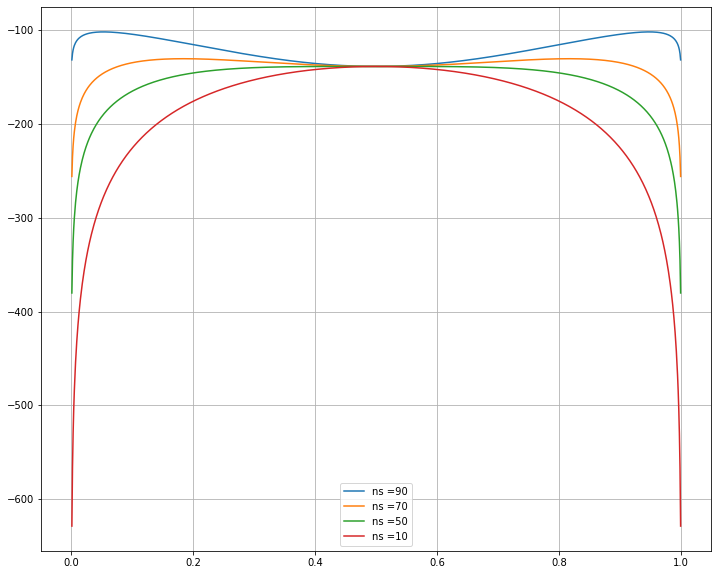

In [438]:
fig3 = plt.figure(figsize=(12,10))
for i in ns_list:
    plt.plot(alpha,log_likelihood(alpha,i,n),label="ns ="+str(i))
    plt.legend()
plt.grid()
fig3.savefig('hw_2_problem6.jpg')

## HW 3, problem1

In [99]:
import numpy as np

In [100]:
from scipy.special import beta

In [101]:
from scipy.integrate import quad
import scipy.stats as st

In [102]:
lst_success = [[3,3],[36,50]]
lst_beta_function = [[1,1],[10,10]]

In [103]:
def prior(alpha,Beta,teta):
    return teta**(alpha-1)*(1-teta)**(Beta-1),alpha/(alpha+Beta)
    
def posterior(r,N,alpha,Beta,teta):
    alpha_prime = alpha + r
    beta_prime = Beta + N - r
    
    return teta**(alpha_prime-1)*(1-teta)**(beta_prime-1),r/N,alpha_prime,beta_prime

In [104]:
teta = np.linspace(0,1,1000)

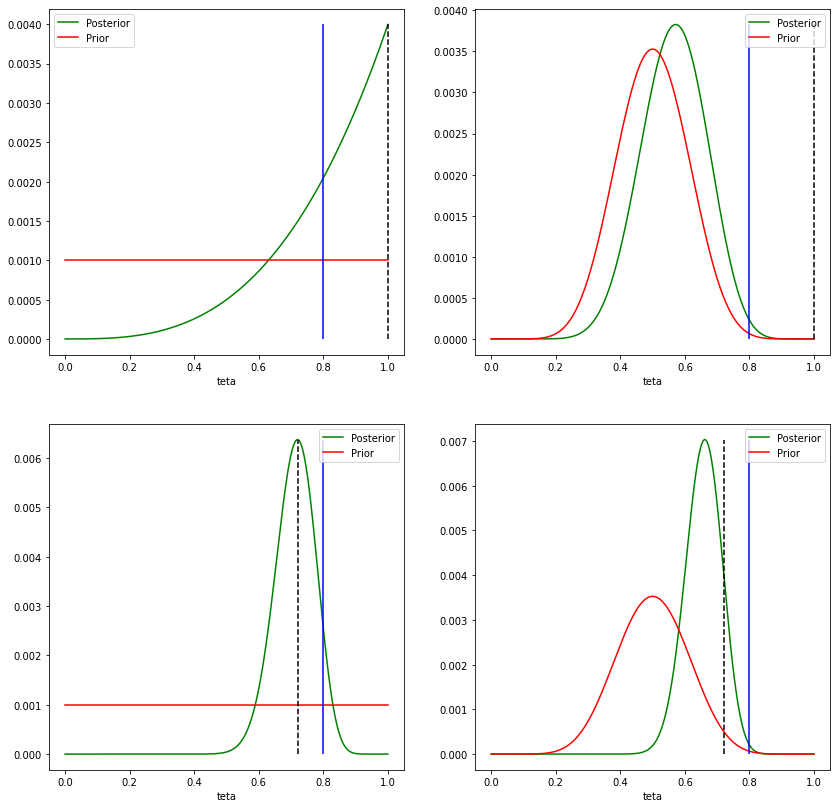

In [105]:
fig4 = plt.figure(figsize=(14,14))
c = 1
sample = []
for i in lst_success:
    for j in lst_beta_function:
        plt.subplot(2,2,c)
        
        res_posterior,ML_estimate,alpha_prime,beta_prime = posterior(i[0],i[1],j[0],j[1],teta)
        res_posterior_normal = [i/np.sum(res_posterior) for i in res_posterior]
        sample.append(np.random.beta(alpha_prime, beta_prime, size=100000))

        res_prior,prior_mean = prior(j[0],j[1],teta)
        res_prior_normal = [i/np.sum(res_prior) for i in res_prior]
        
        plt.plot(teta,res_posterior_normal,color='green',label='Posterior')
        plt.plot(teta,res_prior_normal,color='red',label='Prior')
        plt.xlabel("teta")
        plt.vlines(ML_estimate,0,max(res_posterior_normal),linestyles='--',color='k')
        plt.vlines(0.8,0,max(res_posterior_normal),linestyles='-',color='blue')

        plt.legend()

        c += 1
fig4.savefig('hw_3_problem1.jpg')

In [106]:
from scipy.stats import norm

## getting the confidence interval

In [124]:
def getting_confidence(lst):
    mean = np.mean(lst)
    confidence = 0.95
    std = np.std(lst)
    z_value = norm.ppf((1 + confidence) / 2)
    lower, upper = norm.interval(confidence, loc=mean, scale=std)
    return (lower,upper)

In [125]:
getting_confidence(sample[0])

(0.4822365191460802, 1.1187602294741967)

## problem 6

In [263]:
from scipy.stats import bernoulli
from tqdm import tqdm as tq

In [290]:
teta1 = [0.9,0.8,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
teta2 = [0.9,0.88,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
teta3 = [0.9,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85]

In [17]:
r_k = 0
n_k = 0

In [62]:
def teta_MPE(r_k,n_k):
    return (r_k + 1)/(n_k + 1 + 1)

In [92]:
# random method
def random(teta):
    lst_success = [[] for i in range(0,500)]
    for i in range(0,500):
        r_k = 0
        n_k = 0
        lst_bandits = [[[r_k,n_k] for i in range(0,10)] for i in range(0,500)]
        
        for trial in range(0,1000):
            import random
            bandit_k = random.uniform(0,10)
            bandit_k = int(bandit_k)
            y_k = bernoulli.rvs(size=1,p=teta[bandit_k]) 
            lst_bandits[i][bandit_k][0] += y_k[0]
            lst_bandits[i][bandit_k][1] += 1
            
            max_bandit = 0
            for bandit in range(0,10):
                if max_bandit < teta_MPE(lst_bandits[i][bandit][0],lst_bandits[i][bandit][1]):
                    max_bandit = teta_MPE(lst_bandits[i][bandit][0],lst_bandits[i][bandit][1])
                    index = bandit
            if index == 0:
                lst_success[i].append(1)
            else:
                lst_success[i].append(0)
#             print(lst_success)
                
    return np.mean(lst_success,axis=0)    

In [336]:
# greedy method
def greedy(teta):
    lst_success = [[] for i in range(0,500)]
    for i in range(0,500):
        r_k = 0
        n_k = 0
        lst_bandits = [[[r_k,n_k] for i in range(0,10)] for i in range(0,500)]
        
        for trial in range(0,1000):
            if trial%3 == 0:
                np.random.shuffle(teta)
            max_MPE = 0
            for bandit in range(0,10):
                if max_MPE < teta_MPE(lst_bandits[i][bandit][0],lst_bandits[i][bandit][1]):
                    max_MPE = teta_MPE(lst_bandits[i][bandit][0],lst_bandits[i][bandit][1])
                    bandit_k = bandit
            y_k = bernoulli.rvs(size=1,p=teta[bandit_k])
            lst_bandits[i][bandit_k][0] += y_k[0]
            lst_bandits[i][bandit_k][1] += 1
            
            max_bandit = 0
            for bandit in range(0,10):
                if max_bandit < teta_MPE(lst_bandits[i][bandit][0],lst_bandits[i][bandit][1]):
                    max_bandit = teta_MPE(lst_bandits[i][bandit][0],lst_bandits[i][bandit][1])
                    index = bandit
                    
            max_value = max(teta)
            max_index = teta.index(max_value)
            if index == max_index:
                lst_success[i].append(1)
            else:
                lst_success[i].append(0)
                
    return np.mean(lst_success,axis=0)  

In [299]:
# random Thomson
def thomson(teta):
    lst_success = [[] for i in range(0,500)]
    for i in tq(range(0,500)):
        r_k = 0
        n_k = 0
        lst_bandits = [[[r_k,n_k] for i in range(0,10)] for i in range(0,500)]
        
        for trial in range(0,1000):
            max_sample = 0
            for bandit in range(0,10):
                sample = np.random.beta(lst_bandits[i][bandit][0]+1,lst_bandits[i][bandit][1]-lst_bandits[i][bandit][0]+1, size=1)
                if max_sample < sample:
                    max_sample = sample
                    index = bandit
            
            bandit_k = index
            y_k = bernoulli.rvs(size=1,p=teta[bandit_k]) 
            lst_bandits[i][bandit_k][0] += y_k[0]
            lst_bandits[i][bandit_k][1] += 1
            
            max_bandit = 0
            for bandit in range(0,10):
                if max_bandit < teta_MPE(lst_bandits[i][bandit][0],lst_bandits[i][bandit][1]):
                    max_bandit = teta_MPE(lst_bandits[i][bandit][0],lst_bandits[i][bandit][1])
                    index = bandit
            if index == 0:
                lst_success[i].append(1)
            else:
                lst_success[i].append(0)
#             print(lst_success)
                
    return np.mean(lst_success,axis=0)

## end

## HW5
# problem1


In [ ]:
# part 1

In [714]:
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [887]:
import random
np.random.seed(1)
samples = np.random.uniform(low=-2*np.pi, high=2*np.pi, size=16)
samples

array([-1.04273224,  2.76867924, -6.28174803, -2.48396215, -4.43899639,
       -5.1228243 , -3.94257046, -1.94074114, -1.29725818,  0.48778547,
       -1.01543168,  2.32753689, -3.71396256,  4.75156384, -5.93902266,
        2.14215791])

In [1206]:
dim = [1, 3, 5, 6, 9, 11, 13, 15]
lambdda = 0.005

In [796]:
noise = np.random.normal(0.16,size=16)

In [1651]:
def X_matrix(num_data_x):
    import random
    np.random.seed(1)
    data_x = np.sort(np.random.uniform(low=-2*np.pi, high=2*np.pi, size=16))    
    data_x_plotting = np.sort(np.random.uniform(low=-2*np.pi, high=2*np.pi, size=num_data_x))

    lst = []
    x_matrix = []
    x_matrix_plotting = []
    
    for j in dim:
        lst = np.vander(data_x, j+1, increasing=True)
        lst = scaler.fit_transform(lst)
        x_matrix.append(lst)
        
    for j in dim:
        lst = np.vander(data_x_plotting, j+1, increasing=True)
        lst = scaler.fit_transform(lst)
        x_matrix_plotting.append(lst)
    
    noise = np.random.normal(0,0.16,size=16)
    data_y = np.sin(data_x) + noise
    
    return data_x,x_matrix,data_y,x_matrix_plotting


def x_matrix_for_model_plotting(num_data_x):
    import random
    np.random.seed(1)
    data_x = np.random.uniform(low=-2*np.pi, high=2*np.pi, size=num_data_x)
    data_x = np.sort(np.random.uniform(low=-2*np.pi, high=2*np.pi, size=num_data_x))
    lst = []
    x_matrix = []
    for j in dim:
        lst = np.vander(data_x, j+1, increasing=True)
        lst = scaler.fit_transform(lst)
        x_matrix.append(lst)
    return data_x,x_matrix
    
# def plot_models(num_data_x,model,d):
#     import random
#     np.random.seed(1)
#     data_x = np.random.uniform(low=-2*np.pi, high=2*np.pi, size=num_data_x)

#     x_matrix = []
    
#     data_x_matrix = np.vander(data_x, d+1, increasing=True)
#     data_x_matrix = scaler.fit_transform(data_x_matrix)
    
# #     predictions of a model
# #     print(model.coef_)
# #     predict = model.predict(data_x_matrix)
# #     data_y = predict
#     return data_x,data_y 

def LR_models_predictions(x_matrix,y_train,x_matrix_plotting_model):
    predictions = []
    predict_plotting = []
    models = []
    for i in x_matrix:
        model = LinearRegression()
        model.fit(i, y_train)
        models.append(model)
        predict = model.predict(i)
        predictions.append(predict)
        
    index = 0   
    for i in x_matrix_plotting_model:
        pred = models[index].predict(i)
        predict_plotting.append(pred)
        index += 1
        
    return predictions,models,predict_plotting

def sorting_xy_pairs_for_plot_models(data_x,data_y):
    xy_pairs = list(zip(data_x,data_y))
    sorted_pairs = sorted(xy_pairs)
    data_x_sorted, data_y_sorted = zip(*sorted_pairs)
    return data_x_sorted,data_y_sorted

In [1652]:
# data_x_model_plotting,x_matrix_plotting_model = x_matrix_for_model_plotting(10000)

In [1653]:
data_x_train,x_matrix,data_y_train,x_matrix_plotting = X_matrix(100)
predictions, models,predictions_plotting = LR_models_predictions(x_matrix,data_y_train,x_matrix_plotting_model)

In [1654]:
def plotting():
    for i,j in enumerate(predictions):
#     plt.figure(figsize=(9,5))
        xx = np.linspace(-2*np.pi,2*np.pi,1000)
        plt.plot(xx,np.sin(xx),'g')
        plt.scatter(data_x_train,data_y_train,c='b')

        plt.scatter(data_x_train,predictions[i],c='k',marker='x')
        plt.plot(data_x_model_plotting,predictions_plotting[i],c='r')
#         data_x_model, data_y_model = plot_models(100,models[i],dim[i])
        
#         data_x_model, data_y_model = sorting_xy_pairs_for_plot_models(data_x_model,data_y_model)
#         plt.plot(data_x_model,data_y_model,'r')
        
        plt.title("polynomial degree is ="+str(dim[i]))
        plt.ylim(-2,2)
        plt.show()

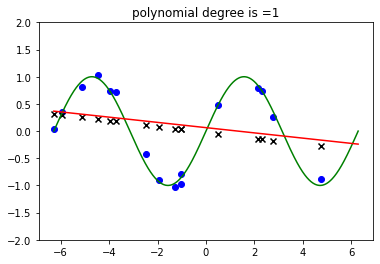

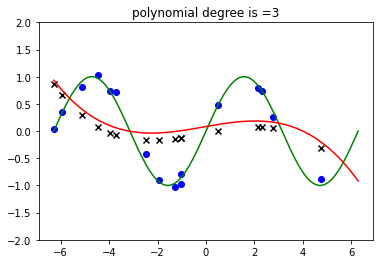

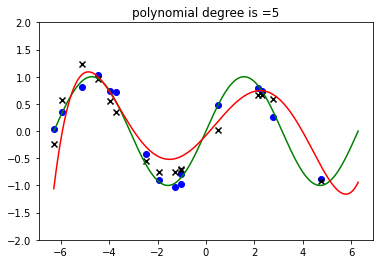

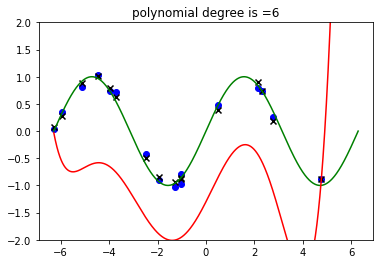

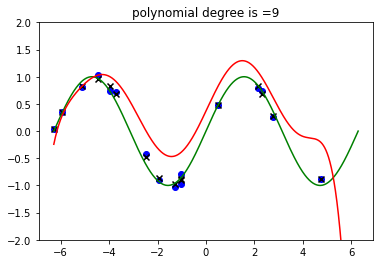

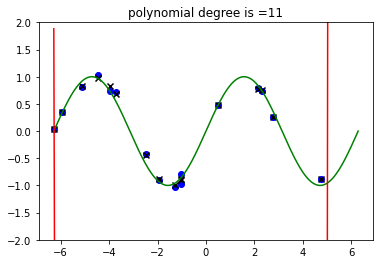

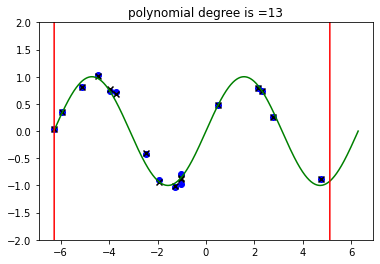

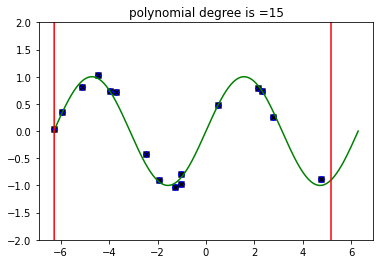

In [1655]:
plotting()

In [1122]:
data_x_model, data_y_model = plot_models(160,models[7],dim[7])

## problem 2

In [1672]:
import numpy as np
import random
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
warnings.filterwarnings("ignore")

In [1673]:
# part a

In [2015]:
weight_data = pd.read_csv("/Users/rezrostami/Desktop/274A/hw/hw5-2023-v1.1/data/P2_w.csv")
x_train_data = pd.read_csv("/Users/rezrostami/Desktop/274A/hw/hw5-2023-v1.1/data/P2_X_train.csv")
x_valid_data = pd.read_csv("/Users/rezrostami/Desktop/274A/hw/hw5-2023-v1.1/data/P2_X_valid.csv")
y_train_data = pd.read_csv("/Users/rezrostami/Desktop/274A/hw/hw5-2023-v1.1/data/P2_y_train.csv")
y_valid_data = pd.read_csv("/Users/rezrostami/Desktop/274A/hw/hw5-2023-v1.1/data/P2_y_valid.csv")

In [2016]:
weight_data = np.array(weight_data).flatten()
x_train_data = np.array(x_train_data)
x_valid_data  = np.array(x_valid_data)
y_train_data  = np.array(y_train_data)
y_valid_data = np.array(y_valid_data)

In [2017]:
weight_data = list(weight_data)

In [2018]:
weight_data.insert(0,0)

In [2019]:
weight_data = np.array(weight_data)

In [2053]:
def LR(x_train_data,y_train_data):
    model = LinearRegression()
    model.fit(x_train_data, y_train_data)
    return model.coef_
def LR_with_L2(x_train_data,y_train_data,x_valid_data,y_valid_data):
    ridge = Ridge()
    alphas = np.arange(0, 5.01, 0.01)
#     mse_list = []
#     for i in range(len(alphas)):
#         model = Ridge(alpha=alphas[i])
#         model.fit(x_train_data, y_train_data)
#         y_pred = model.predict(x_valid_data)
#         mse = mean_squared_error(y_valid_data, y_pred)
#         mse_list.append(mse)
#     optimal_alpha = alphas[np.argmin(mse_list)]
#     print(mse_list)
    grid = GridSearchCV(ridge, param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
    grid.fit(x_valid_data, y_valid_data)
    print('Best regularization parameter',grid.best_params_)
    best_ridge = Ridge(alpha=grid.best_params_['alpha'])
    best_ridge.fit(x_train_data, y_train_data)

    return best_ridge.coef_
    
def LR_with_L1(x_train_data,y_train_data,x_valid_data,y_valid_data):
    lasso = Lasso()
    alphas = np.arange(0, 5.01, 0.01)
    grid = GridSearchCV(lasso, param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
    grid.fit(x_valid_data, y_valid_data)
    print('Best regularization parameter',grid.best_params_)
    best_lasso = Lasso(alpha=grid.best_params_['alpha'])
    best_lasso.fit(x_train_data, y_train_data)
    
    return best_lasso.coef_

def train_LR_with_L1_with_diff_alphas(x_train_data,y_train_data):
    ridge = Lasso()
    alphas = np.arange(0, 1.01, 0.01)
    lasso_models = []
    for i in range(len(alphas)):  
        lasso = Lasso(alpha=alphas[i])
#         print(alphas[i])
        lasso.fit(X_train, y_train)
        lasso_models.append(lasso.coef_.flatten())
    return lasso_models
def TPR(non_zero_index,coefs):
    lst = []
    score_lst = []
    for coef in coefs:
        score = 0
        for i in non_zero_index:
            if coef[i] != 0:
                score += 1
        score_lst.append(score)
    return score_lst
def FPR(zero_index,coefs):
    lst = []
    score_lst = []
    for coef in coefs:
        score = 0
        for i in zero_index:
            if coef[i] != 0:
                score += 1
        score_lst.append(score)
    return score_lst

In [2054]:
fpr = FPR(zero_index,coefs)

In [2055]:
tpr = TPR(non_zero_index,coefs)

In [2056]:
non_zero_index = [1,3,5,7,9]
zero_index = [0,2,4,6,8]

In [2057]:
coefs = train_LR_with_L1_with_diff_alphas(x_train_data,y_train_data)

In [2060]:
ordinary_LR = LR(x_train_data,y_train_data).flatten()
ridge = LR_with_L2(x_train_data,y_train_data, x_valid_data,y_valid_data).flatten()
lasso = LR_with_L1(x_train_data,y_train_data, x_valid_data,y_valid_data).flatten()

Best regularization parameter {'alpha': 0.08}
Best regularization parameter {'alpha': 0.01}


In [2061]:
learned_models_weights = [weight_data,ordinary_LR,ridge,lasso]

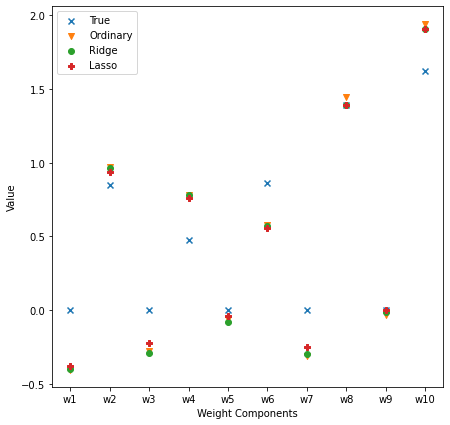

In [2062]:
plt.figure(figsize=(7,7))
weights = ['w1', 'w2', 'w3', 'w4', 'w5','w6','w7','w8','w9','w10']
markers = ['x','v','o','P']
labels = ['True','Ordinary','Ridge','Lasso']
index = 0
for i in learned_models_weights:
    plt.scatter(weights, i,marker=markers[index],label=labels[index])
    index += 1
    plt.xlabel('Weight Components')
    plt.ylabel('Value')
    plt.legend()

In [1697]:
# part b

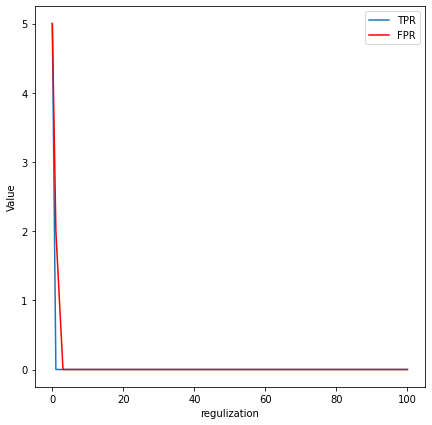

In [1701]:
plt.figure(figsize=(7,7))

plt.plot(tpr,label='TPR')
plt.plot(fpr,label="FPR",c='r')

plt.xlabel('regulization')
plt.ylabel('Value')
plt.legend()

## problem 3

In [1880]:
import math
from scipy.stats import multivariate_normal

In [2151]:
# part 2
X = pd.read_csv("/Users/rezrostami/Desktop/274A/hw/hw5-2023-v1.1/data/P3_X.csv",header=None)
Y = pd.read_csv("/Users/rezrostami/Desktop/274A/hw/hw5-2023-v1.1/data/P3_y.csv",header=None)

In [2152]:
X = np.array(X)
Y = np.array(Y)

In [1779]:
Y = Y.reshape(-1)

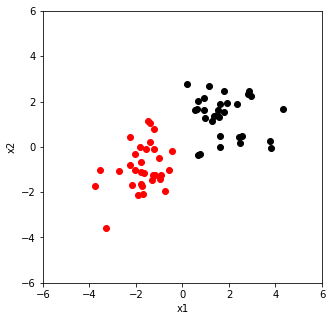

In [2483]:
plt.figure(figsize=(5,5))
index = 0
for i in X:
    if Y[index] == 0:
        plt.scatter(i[0],i[1],c='r')
        
    else:
        plt.scatter(i[0],i[1],c='k')  
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    index += 1

In [1887]:
def log_P(w1,w2):
    index = 0
    Z = 0
    for i in X:
        w = np.array([w1,w2])
        x = np.array([i[0],i[1]])
        Z += np.dot(w.T,x)*Y[index] - np.log(1+np.exp(np.dot(w.T,x)))
        index += 1
    return Z

In [1946]:
def log_P_bar(w1,w2):
    pos = np.dstack((w1, w2))
    norm = multivariate_normal(mean=np.zeros(2), cov=np.identity(2))
    log_prob = norm.logpdf(pos)
    Z_bar = log_P(w1,w2) + log_prob
    return Z_bar

In [1947]:
w1 = np.linspace(-6,6)
w2 = np.linspace(-6,6)

In [1948]:
W1,W2 = np.meshgrid(w1,w2)

In [2100]:
Z = log_P(W1,W2)
max_value = np.max(Z)
max_x, max_y = np.where(Z == max_value)

In [1950]:
Z_bar = log_P_bar(W1,W2)
max_value_map = np.max(Z_bar)
max_x_bar, max_y_bar = np.where(Z_bar == max_value_map)

In [2088]:
W_ML = (w1[max_x][0],w2[max_y][0])
W_ML = np.array(W_ML)

In [1958]:
max_value

-0.11733584731811797

In [2334]:
W_MAP = (w1[max_x_bar][0],w2[max_y_bar][0])
W_MAP = np.array(W_MAP)

In [2503]:
W_MAP

array([2.08163265, 0.85714286])

In [2504]:
W_ML

array([6.        , 2.08163265])

In [1960]:
max_value_map

-6.78389376148595

Text(0, 0.5, 'w2')

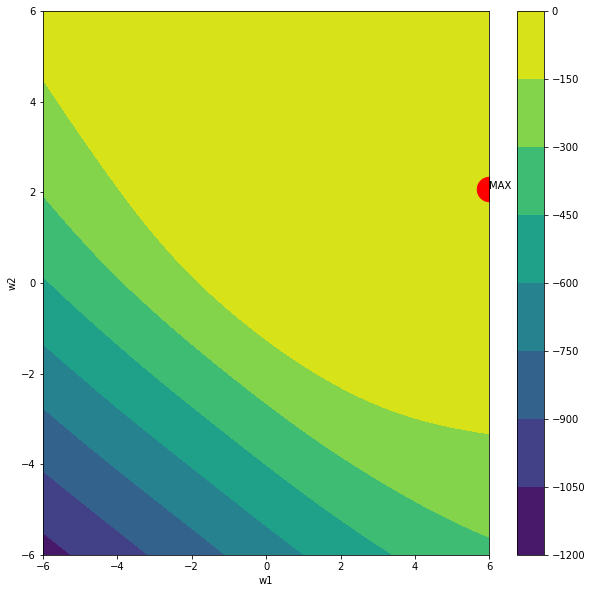

In [1961]:
plt.figure(figsize=(10,10))

plt.contourf(W1, W2, Z,cmap='viridis')
plt.colorbar(plt.contourf(W1, W2, Z,cmap='viridis'))
plt.scatter(w1[max_x], w2[max_y], color='r',s=600)
plt.text(w1[max_x], w2[max_y],'MAX')
plt.xlabel('w1')
plt.ylabel('w2')

Text(0, 0.5, 'w2')

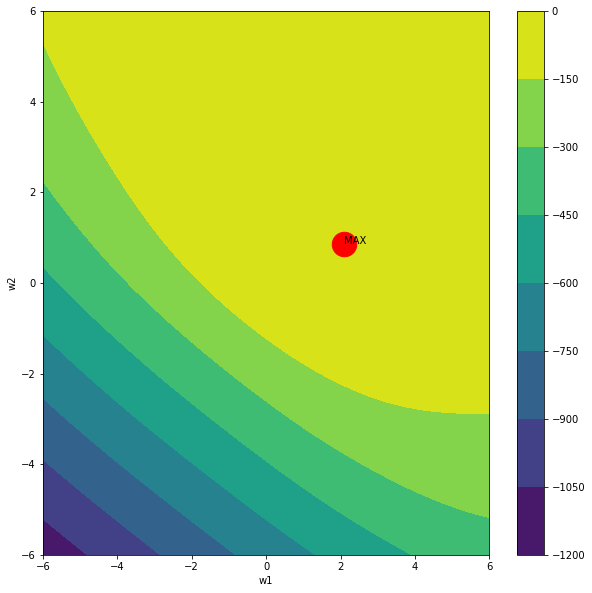

In [1962]:
plt.figure(figsize=(10,10))

plt.contourf(W1, W2, Z_bar,cmap='viridis')
plt.colorbar(plt.contourf(W1, W2, Z_bar,cmap='viridis'))
plt.scatter(w1[max_x_bar], w2[max_y_bar], color='r',s=600)
plt.text(w1[max_x_bar], w2[max_y_bar],'MAX')
plt.xlabel('w1')
plt.ylabel('w2')

In [ ]:
x2_map = decision_boundry(W_MAP[0],W_MAP[1])
x2_ml = decision_boundry(W_ML[0],W_ML[1])

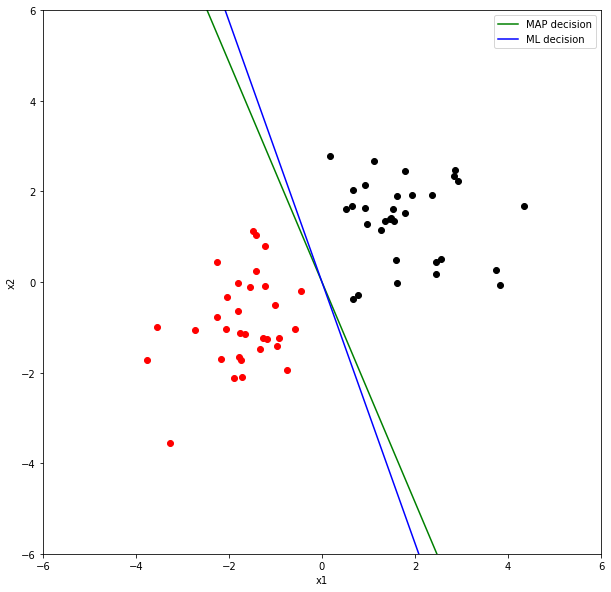

In [2009]:
plt.figure(figsize=(10,10))
index = 0
for i in X:
    if Y[index] == 0:
        plt.scatter(i[0],i[1],c='r')
        
    else:
        plt.scatter(i[0],i[1],c='k')  
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    index += 1
x1 = np.linspace(-6,6)   
plt.plot(x1,x2_map,label='MAP decision',c='g')
plt.plot(x1,x2_ml,label='ML decision',c='blue')
plt.legend()

In [1992]:
def decision_boundry(w1,w2):
    x1 = np.linspace(-6,6)
    x2 = -(w1/w2)*x1
    return x2

In [2063]:
# part 6

In [2523]:
def sigmoid(W,x):
    p = 1/(1+np.exp(-np.dot(W.T,x)))
    if p >= 0.5:
        return p
    if p < 0.5:
        return (1 - p)

def hessian_compute(X_mat,F,sigma):
    H = np.dot(X_mat.T@F,X_mat) + (1/(sigma)**2)*np.identity(2)
    return np.linalg.inv(H)
    
def F_compute(X_mat):
    lst = []
    index = 0
    for i in range(len(X_mat)): 
        f_i = sigmoid(W_MAP,X_mat[i])*(1-sigmoid(W_MAP,X_mat[i]))
        lst.append(f_i)
    F = np.diag(lst)
    return F

def ML_estimate(X):
    p = 1/(1+np.exp(-np.dot(W_ML.T,X)))
    if p >= 0.5:
        return p
    if p < 0.5:
        return (1 - p)

def MAP_estimate(X):
    p = 1/(1+np.exp(-np.dot(W_MAP.T,X)))
    if p >= 0.5:
        return p
    if p < 0.5:
        return (1 - p)

def Baysian(k_v,m):
    p = 1/(1+np.exp(-k_v*m))
    if p >= 0.5:
        return p
    if p < 0.5:
        return (1 - p)

In [2535]:
F = F_compute(x_lst)

In [2536]:
inv_hessian = hessian_compute(x_lst,F,1)

In [2537]:
k_v_lst = []
m_lst = []
index = 0
for i in x_lst:
    i = np.array(i)
    v = np.dot(i.T@inv_hessian,i)
    k_v = (1+(np.pi/8)*v)**-0.5
    m = W_MAP.T@i
    m_lst.append(m)
    k_v_lst.append(k_v)
    
k_v_lst = np.array(k_v_lst)
m_lst = np.array(m_lst)

In [2474]:
x1 = np.linspace(-6,6)
x2 = np.linspace(-6,6)
X1, X2 = np.meshgrid(x1, x2)
x_lst = []
for i in range(len(X1)):
    for j in range(len(X2)):
        current_x = X1[i, j]
        current_y = X2[i, j]
        x_lst.append([current_x,current_y])
x_lst = np.array(x_lst)       
XX = np.vstack((X1.reshape(-1), X2.reshape(-1)))

In [2538]:
z_bayes = []
for i in range(len(k_v_lst)):
    z_bayes.append(Baysian(k_v_lst[i],m_lst[i]))
z_bayess = np.array(z_bayes)

In [2525]:
z_ml = []
for i in range(len(x_lst)):
    z_ml.append(ML_estimate(x_lst[i]))
z_ml = np.array(z_ml)

In [2530]:
z_map = []
for i in range(len(x_lst)):
    z_map.append(MAP_estimate(x_lst[i]))
z_map = np.array(z_map)

Text(0.5, 1.0, 'ML')

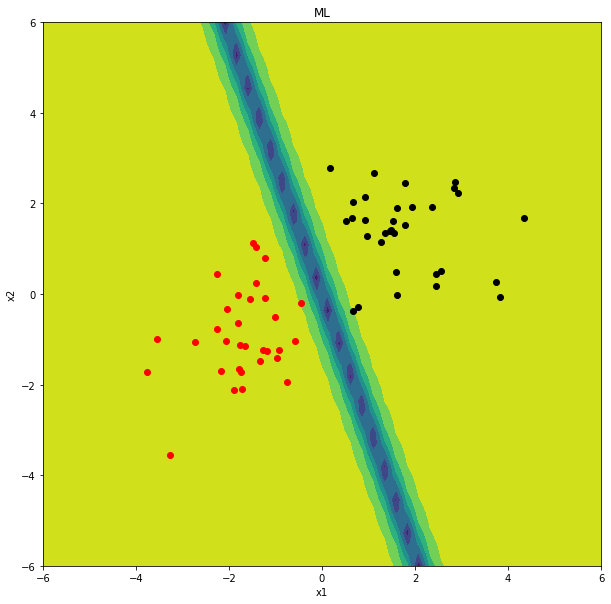

In [2526]:
plt.figure(figsize=(10,10))
plt.contourf(X1, X2, z_ml.reshape(50,50))
index = 0
for i in X:
    if Y[index] == 0:
        plt.scatter(i[0],i[1],c='r')
        
    else:
        plt.scatter(i[0],i[1],c='k')  
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    index += 1
plt.title('ML')
    
# plt.contour(X1, X2, Z_ML)

Text(0.5, 1.0, 'MAP')

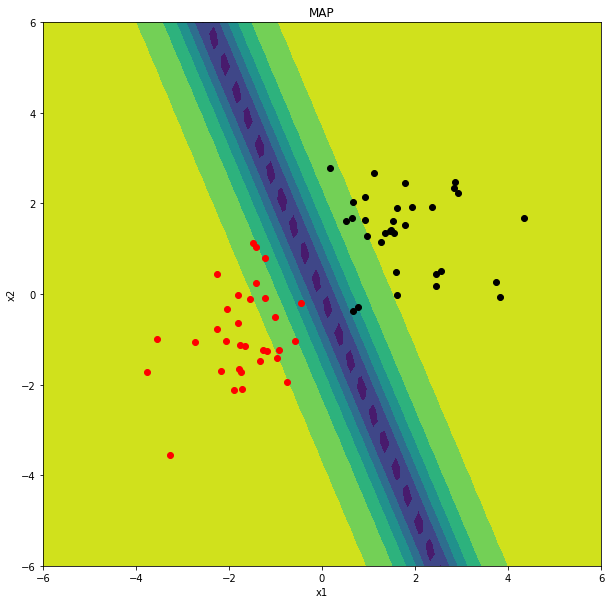

In [2531]:
plt.figure(figsize=(10,10))
plt.contourf(X1, X2, z_map.reshape(50,50))
index = 0
for i in X:
    if Y[index] == 0:
        plt.scatter(i[0],i[1],c='r')
        
    else:
        plt.scatter(i[0],i[1],c='k')  
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    index += 1
plt.title('MAP')

Text(0.5, 1.0, 'Bayesian')

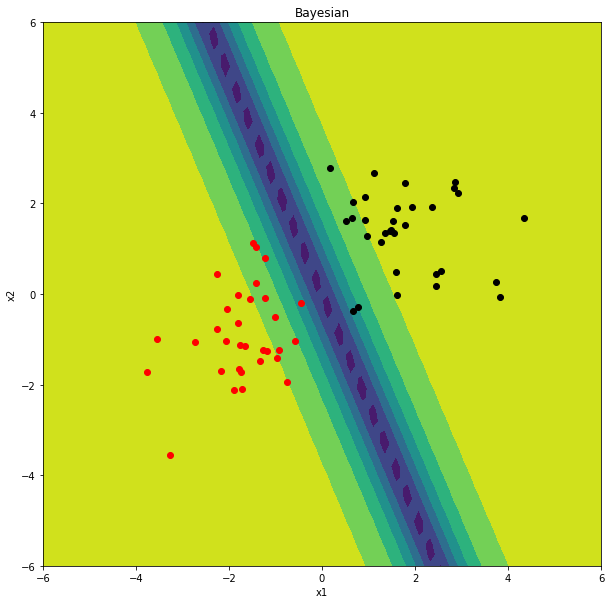

In [2539]:
plt.figure(figsize=(10,10))
plt.contourf(X1, X2, np.array(z_bayes).reshape((50, 50)))
index = 0
for i in X:
    if Y[index] == 0:
        plt.scatter(i[0],i[1],c='r')
        
    else:
        plt.scatter(i[0],i[1],c='k')  
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    index += 1
plt.title('Bayesian')

## END

In [2372]:
fff = np.array(z_bayes).reshape((50, 50))-Z_MAP